<a href="https://colab.research.google.com/github/sudachicitrus/zero_dl2/blob/main/practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np

class Bandit:
    def __init__(self, arms=10):
        self.rates = np.random.rand(arms)

    def play(self, arm):
        rate = self.rates[arm]
        if rate > np.random.rand():
            return 1
        else:
            return 0

In [3]:
bandit = Bandit()

for i in range(3):
    print(bandit.play(0))

0
0
1


In [4]:
Q = 0

for n in range(1,11):
    reward = bandit.play(0)
    Q += (reward - Q) / n
    print(Q)

0.0
0.0
0.3333333333333333
0.5
0.6
0.5
0.4285714285714286
0.5
0.5555555555555556
0.5


In [5]:
bandit = Bandit()
Qs = np.zeros(10)
ns = np.zeros(10)

for n in range(10):
    action = np.random.randint(0,10)
    reward = bandit.play(action)

    ns[action] += 1
    Qs[action] += (reward - Qs[action]) / ns[action]
    print(Qs)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0.  0.  0.  0.  0.  0.  0.  0.  0.5 0. ]
[0.  0.  0.  0.  0.  0.  0.  0.  0.5 0. ]
[0.  0.  0.  0.  0.  0.  0.  0.  0.5 0. ]
[0.  0.  0.  0.  1.  0.  0.  0.  0.5 0. ]
[0.  0.  0.  0.  1.  0.  0.  0.  0.5 0. ]
[0.  0.  0.  0.  1.  0.  0.  0.  0.5 0. ]
[0.  0.  0.  0.  1.  0.  0.  0.  0.5 0. ]
[0.  0.  0.  0.  1.  0.  0.  0.  0.5 0. ]


In [6]:
class Agent:
    def __init__(self, epsilon, action_size=10):
        self.epsilon = epsilon
        self.Qs = np.zeros(action_size)
        self.ns = np.zeros(action_size)

    def update(self, action, reward):
        self.ns[action] += 1
        self.Qs[action] += (reward - self.Qs[action]) / self.ns[action]

    def get_action(self):
        if np.random.rand() < self.epsilon:
            return np.random.randint(0, len(self.Qs))
        return np.argmax(self.Qs)

950


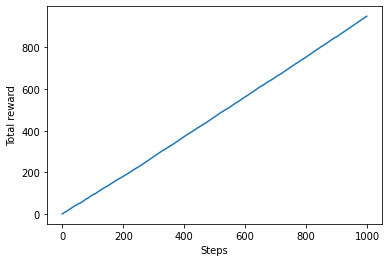

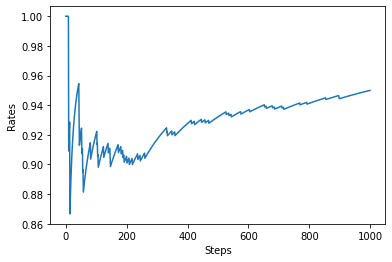

In [7]:
import matplotlib.pyplot as plt

steps = 1000
epsilon = 0.1

bandit = Bandit()
agent = Agent(epsilon)
total_reward = 0
total_rewards = []
rates = []

for step in range(steps):
    action = agent.get_action()
    reward = bandit.play(action)
    agent.update(action, reward)
    total_reward += reward

    total_rewards.append(total_reward)
    rates.append(total_reward / (step+1))

print(total_reward)

plt.ylabel("Total reward")
plt.xlabel('Steps')
plt.plot(total_rewards)
plt.show()

plt.ylabel('Rates')
plt.xlabel('Steps')
plt.plot(rates)
plt.show()

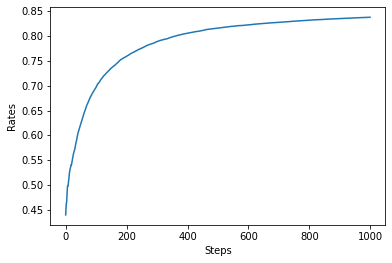

In [8]:
runs = 200
steps = 1000
episilon = 0.1
all_rates = np.zeros((runs, steps))

for run in range(runs):
    bandit = Bandit()
    agent = Agent(epsilon)
    total_reward = 0
    rates = []

    for step in range(steps):
        action = agent.get_action()
        reward = bandit.play(action)
        agent.update(action, reward)
        total_reward += reward
        rates.append(total_reward / (step+1))

    all_rates[run] = rates
avg_rates = np.average(all_rates, axis=0)

plt.ylabel('Rates')
plt.xlabel('Steps')
plt.plot(avg_rates)
plt.show()

In [9]:
class NonStatBandit:
    def __init__(self, arms=10):
        self.arms = arms
        self.rates = np.random.rand(arms)

    def play(self, arm):
        rate = self.rates[arm]
        self.rates += 0.1 * np.random.randn(self.arms)
        if rate > np.random.rand():
            return 1
        else:
            return 0

In [10]:
class AlphaAgent:
    def __init__(self, epsilon, alpha, actions=10):
        self.epsilon = epsilon
        self.Qs = np.zeros(actions)
        self.alpha = alpha

    def update(self, action, reward):
        self.Qs[action] += (reward - self.Qs[action]) * self.alpha

    def get_action(self):
        if np.random.rand() < self.epsilon:
            return np.random.randint(0, len(self.Qs))
        return np.argmax(self.Qs)

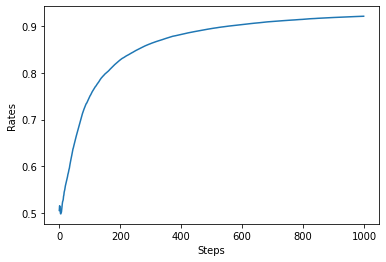

In [12]:
runs = 200
steps = 1000
episilon = 0.1
alpha = 0.8
all_rates = np.zeros((runs, steps))

for run in range(runs):
    bandit = NonStatBandit()
    agent = AlphaAgent(epsilon,alpha)
    total_reward = 0
    rates = []

    for step in range(steps):
        action = agent.get_action()
        reward = bandit.play(action)
        agent.update(action, reward)
        total_reward += reward
        rates.append(total_reward / (step+1))

    all_rates[run] = rates
avg_rates = np.average(all_rates, axis=0)

plt.ylabel('Rates')
plt.xlabel('Steps')
plt.plot(avg_rates)
plt.show()

In [13]:
V = 1
for i in range(1, 100):
    V += -1 * (0.9 ** i)

print(V)

-7.999734386011124
